In [15]:
# 練習問題10

%matplotlib inline
from ipywidgets import interactive
import numpy as np
import matplotlib.pyplot as plt
import math

def sin(x):
    return math.sin(x)

def d0sin(n):
    if(n % 2 == 0):
        return 0
    return (-1)**(n // 2)

def taylorsin(n,x):
    return sum([d0sin(i)*(x**i)/math.factorial(i) for i in range(n)])

def taylorsingraph(i):
    x = np.linspace(-10, 10, 1000)
    plt.axis([-10,10,-2,2.0])
    y = [sin(z) for z in x]
    plt.plot(x, y)
    y = [taylorsin(i, z) for z in x] 
    plt.plot(x, y)
    plt.show()

interactive(taylorsingraph, i=(0,20,1))
#    taylorsingraph(3)

interactive(children=(IntSlider(value=10, description='i', max=20), Output()), _dom_classes=('widget-interact'…

In [12]:
def logp1(x):
    return math.log(x+1)

def d0logp1(n):
    if(n == 0): 
        return 0
    return math.factorial(n-1)*((-1)**(n+1))

def taylor(fun,n,x):
    return sum([fun(i)*(x**i)/math.factorial(i) for i in range(n)])

funs = dict()
funs['sin'] = (sin, d0sin, -10, 10, -2, 2)
funs['logp1'] = (logp1, d0logp1, -0.9, 10, -2, 2)

def taylorgraph(fname,i):
    (f, df, min, max, ymin, ymax) = funs[fname]
    x = np.linspace(min, max, 1000)
    plt.axis([min,max,ymin,ymax])
    y = [f(z) for z in x]
    plt.plot(x, y)
    y = [taylor(df, i, z) for z in x] 
    plt.plot(x, y, label=fname+" " + str(i))
    plt.legend(loc='lower right')
    plt.show()

interactive(taylorgraph, fname=(['sin', 'logp1']), i=(0,20,1))


interactive(children=(Dropdown(description='fname', options=('sin', 'logp1'), value='sin'), IntSlider(value=10…

In [20]:
# 練習問題21
# sin(x-a) に対して行う。a の値を動かせるようにする。

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

a = 0
def sin(x):
    return math.sin(x+a)

def d0sin(n):
    if(n % 2 == 0):
        return (-1)**(n//2)*math.sin(a)
    return (-1)**(n//2)*math.cos(a)

def taylorsin(n,x):
    return sum([d0sin(i)*(x**i)/math.factorial(i) for i in range(n)])

def taylorsingraph(i,a1):
    global a;
    a = a1;
    x = np.linspace(-10, 10, 1000)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.grid()
    ax.axis([-10,10,-5,5.0])
    y = [sin(z) for z in x]
    ax.plot(x, y, label=f"sin(x-{a})")
    y = [taylorsin(i, z) for z in x] 
    ax.plot(x, y)
    ax.legend(loc='upper left')
    for d in ['bottom', 'left']:
        ax.spines[d].set_position(('data', 0));
    plt.show();

interactive(taylorsingraph, i=(0,20,1), a1=(-2*math.pi, 2*math.pi, 0.1))


interactive(children=(IntSlider(value=10, description='i', max=20), FloatSlider(value=-0.08318530717958605, de…

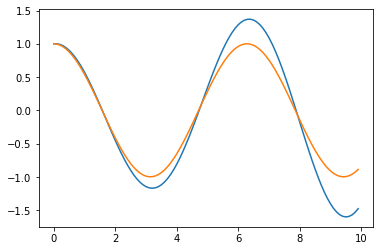

In [16]:
# 練習問題30
%matplotlib inline
import matplotlib.pyplot as plt
import math

def oscillation():
    t = 0
    x = 1
    y = 0
    delta = 0.1 # この値を変えてみよう
    timeline = []
    ix = []
    iy = []
    for n in range(100):
        ix.append(x)
        iy.append(y)
        timeline.append(t)
        x, y = x + y * delta, y - x * delta
        t = t + delta
    plt.plot(timeline, ix)

    y = [math.cos(t) for t in timeline]
    plt.plot(timeline, y)
    plt.show
    
oscillation()    

In [3]:
# 練習問題40
%matplotlib tk
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D

def Lorenz():
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, projection='3d')
    
    p, r, b = 10, 28, 8/3
    x, y, z, t = 1, 1, 1, 0 
    delta = 0.01
    ix, iy, iz = [], [], []

    for n in range(4000):
        ix.append(x)
        iy.append(y)
        iz.append(z)
        x, y, z = x + (-p*x + p*y) * delta, \
                  y + (-x*z + r*x -y) * delta, \
                  z + (x*y - b*z) * delta
    ax.plot(ix, iy, iz)
    plt.show()
    
    
Lorenz()


In [2]:
# ルンゲクッタ法，
def rk(f, t, y, h):
    '''ルンゲクッタ法。f に微分方程式，y に現在値，h に時間の差分を与える。
    h 時間後の y の新しい値を返す。 y は，ndarray のベクトル値でも可'''
    k1 = f(t, y)
    k2 = f(t + h/2, y + k1*h/2)
    k3 = f(t + h/2, y + k2*h/2)
    k4 = f(t+h, y + k3*h)
    newy = y + (k1 + 2*k2 + 2*k3 + k4)*h/6
    newt = t + h
#    newy = y + f(t,y)*h
    return newy

In [3]:
# 練習問題40
%matplotlib tk
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
'''ルンゲクッタ法で，ローレンツ・アトラクタを描画'''
ax = plt.subplot(111, projection='3d')

p, r, b = 10, 28, 8/3
t = 0
v = np.array([1,1,1])
delta = 0.01
def lor(t, v):
    '''微分方程式。v には，ndarray を与え，ndarray を返す'''
    (x,y,z) = (v[0], v[1], v[2])
    return(np.array([(-p*x + p*y), \
              (-x*z + r*x -y), \
              (x*y - b*z)]))

ix, iy, iz = [], [], []

for n in range(5000):
    ix.append(v[0])
    iy.append(v[1])
    iz.append(v[2])
    v = rk(lor, t, v, delta) 
    t = t + delta

ax.plot(ix, iy, iz)

plt.show()